# Calibration and Apriltag Measurement Testing

## Imports

In [2]:
import sys
import time
import matplotlib.pyplot as plt
import cv2
import math

import delivery_driver as dd

sys.path.append("../../deliveryrobot")
from utilities.utilities import *
from sensors.camera.apriltagsensor import *
from sensors.calibration.camera_calibration import *
from navigation.filters.kalman_filter import *

## Camera Initialization

In [3]:
robot = dd.DeliveryRobot()
sensor = AprilTagSensor(cal_dir)

AprilTag sensor setup COMPLETE


## General Measurement

In [15]:
n = 0
yaw_meas = []
while n < 50:
    april_img = robot.take_picture(image_dir + "/testing/apriltagsensor_test/")
    measurements={}
    sensor.detect(april_img, measurements)
    yaw_meas.append(measurements["1"][2])
    #print(f"{measurements['1'][0]}\t{measurements['1'][1]}\t{measurements['1'][2]}")
    
    n+=1

## Kalman Filter Testing

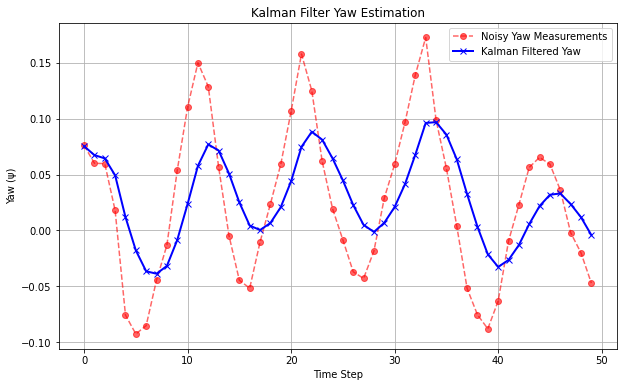

In [20]:
# Initialize the Kalman filter with tunable process and measurement variances
kf = KalmanFilter(process_var=0.001, measurement_var=0.01)

# Apply the Kalman filter to the noisy measurements
filtered_yaw = [kf.update(measurement) for measurement in yaw_meas]

# Plot the noisy measurements and Kalman-filtered yaw
plt.figure(figsize=(10, 6))
plt.plot(yaw_meas, label='Noisy Yaw Measurements', linestyle='--', marker='o', color='red', alpha=0.6)
plt.plot(filtered_yaw, label='Kalman Filtered Yaw', linestyle='-', marker='x', color='blue', linewidth=2)
plt.title('Kalman Filter Yaw Estimation')
plt.xlabel('Time Step')
plt.ylabel('Yaw (ψ)')
plt.legend()
plt.grid(True)
plt.show()

## Error Testing

In [3]:
actual_measurements = [0.0, 0.2, 0.4, 0.6]

yaw = []
yaw_min = []
yaw_mean = []
yaw_max = []
yaw_stdev = []

meas_idx = 0

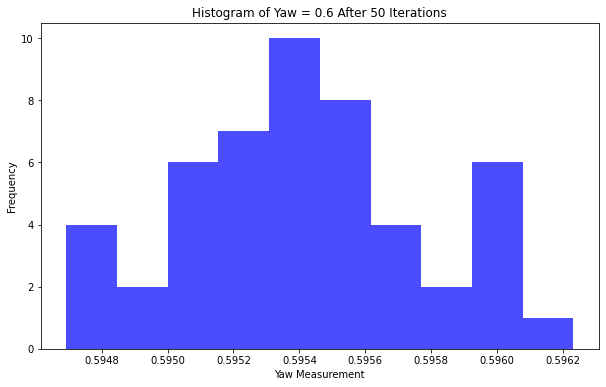

In [7]:
count = 0

yaw_n = []

while count < 50:
    april_img = robot.take_picture(image_dir + "/testing/apriltagsensor_test/")
    measurements={}
    sensor.detect(april_img, measurements)
    #print(f"{measurements['1'][0]}\t{measurements['1'][1]}\t{measurements['1'][2]}")
    yaw_n.append(measurements['1'][2])
    count += 1
    
yaw_n = np.array(yaw_n)
yaw.append(np.mean(yaw_n))
yaw_min.append(np.min(yaw_n))
yaw_mean.append(np.mean(yaw_n))
yaw_max.append(np.max(yaw_n))
yaw_stdev.append(np.std(yaw_n))

# After the loop, create a histogram
plt.figure(figsize=(10, 6))
plt.hist(yaw_n, bins=10, color='blue', alpha=0.7)

# Add titles and labels
plt.title(f'Histogram of Yaw = {actual_measurements[meas_idx]} After 50 Iterations')
plt.xlabel('Yaw Measurement')
plt.ylabel('Frequency')

# Show the plot
plt.savefig(f"psi_{actual_measurements[meas_idx]}_distribution.png")

meas_idx += 1

In [7]:
print(yaw)
print(yaw_min)
print(yaw_mean)
print(yaw_max)
print(yaw_stdev)

[-0.46899909241592935, -0.32941984154076154]
[-0.4740550319242842, -0.33316825676585954]
[-0.46899909241592935, -0.32941984154076154]
[-0.4661902926275897, -0.3258226335530693]
[0.0016841103954879039, 0.002041403698284753]


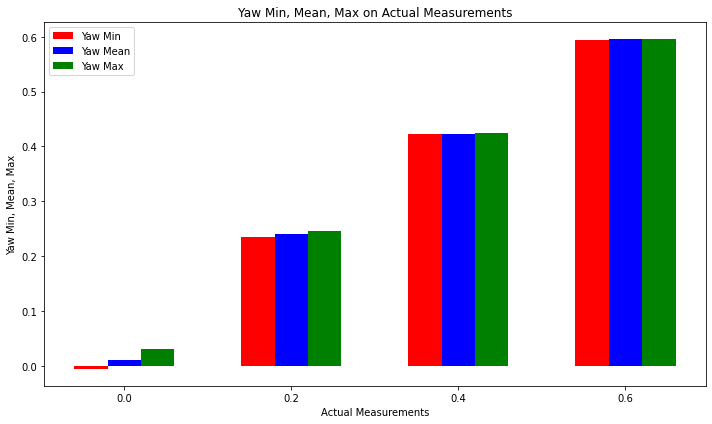

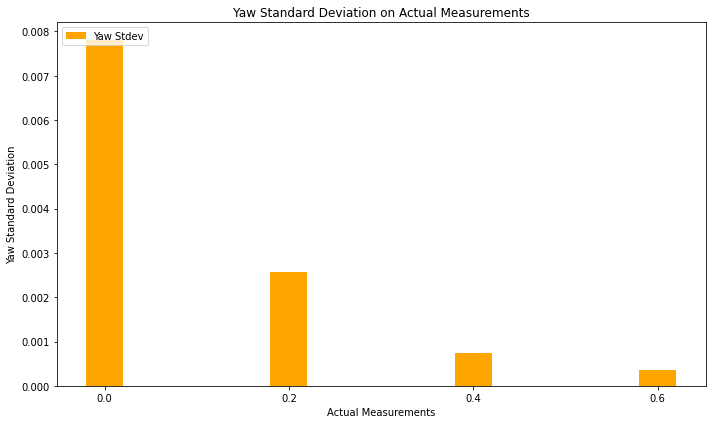

In [8]:
# Plotting the Yaw Min, Mean, Max on one graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Min, Mean, Max as bar chart
bar_width = 0.2
x = np.arange(len(actual_measurements))

ax1.bar(x - bar_width, yaw_min, width=bar_width, label='Yaw Min', color='red')
ax1.bar(x, yaw_mean, width=bar_width, label='Yaw Mean', color='blue')
ax1.bar(x + bar_width, yaw_max, width=bar_width, label='Yaw Max', color='green')

# Label for the y-axis
ax1.set_xlabel('Actual Measurements')
ax1.set_ylabel('Yaw Min, Mean, Max')
ax1.set_xticks(x)
ax1.set_xticklabels(actual_measurements)
ax1.legend(loc='upper left')

# Title and layout
plt.title('Yaw Min, Mean, Max on Actual Measurements')
plt.tight_layout()

# Show the first plot
plt.savefig(f'yaw_measurements_trends.png')

# Now plot the standard deviation on a separate graph
fig, ax2 = plt.subplots(figsize=(10, 6))

# Plot standard deviation as a bar chart
ax2.bar(x, yaw_stdev, width=bar_width, label='Yaw Stdev', color='orange')

# Label for the y-axis
ax2.set_xlabel('Actual Measurements')
ax2.set_ylabel('Yaw Standard Deviation')
ax2.set_xticks(x)
ax2.set_xticklabels(actual_measurements)
ax2.legend(loc='upper left')

# Title and layout
plt.title('Yaw Standard Deviation on Actual Measurements')
plt.tight_layout()

# Show the second plot
plt.savefig(f'yaw_measurements_trends_stdev.png')

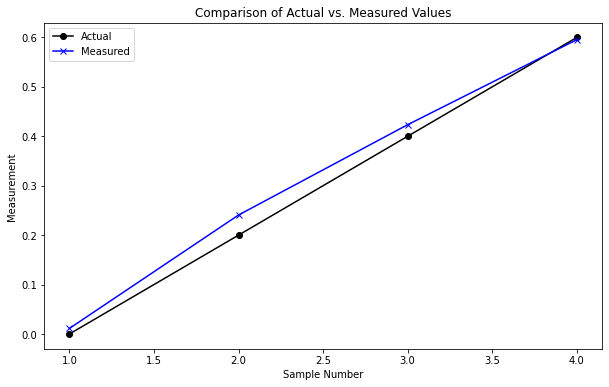

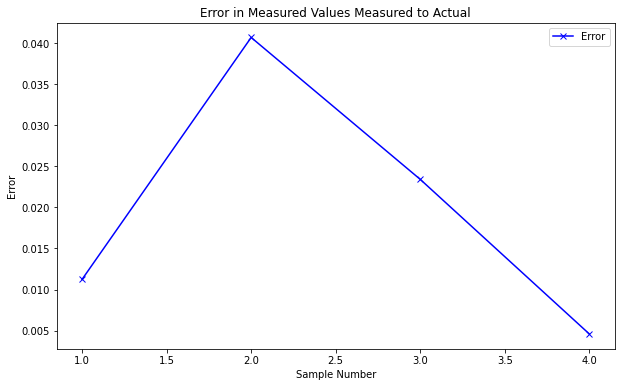

In [11]:


# Calculate errors relative to the actual measurements
error_yaw = [abs(m2 - actual) for m2, actual in zip(yaw, actual_measurements)]

# Plot actual measurements and the three sets of measurements
plt.figure(figsize=(10, 6))

sample_numbers = list(range(1, len(actual_measurements)+1))  # Samples 1 through 7

# Plot actual values
plt.plot(sample_numbers, actual_measurements, label='Actual', marker='o', color='black')

# Plot method 3 measurements
plt.plot(sample_numbers, yaw, label='Measured', marker='x', color='blue')

# Add labels and legend
plt.xlabel('Sample Number')
plt.ylabel('Measurement')
plt.title('Comparison of Actual vs. Measured Values')
plt.legend()

# Show the plot
plt.savefig(f'actual_measured_comparison.png')

# Optional: If you also want to plot the errors, here’s how:
plt.figure(figsize=(10, 6))
plt.plot(sample_numbers, error_yaw, label='Error', marker='x', color='blue')

plt.xlabel('Sample Number')
plt.ylabel('Error')
plt.title('Error in Measured Values Measured to Actual')
plt.legend()

plt.savefig(f'actual_measured_comparison_error.png')

Original meas2: [-0.62758117 -0.46035073 -0.28356365 -0.08240879  0.33967511  0.51501444
  0.69924736]
Transformed meas2 (aligned to actual): [-0.6        -0.44875474 -0.28886634 -0.10693941  0.27479845  0.43337749
  0.6       ]
Actual measurements: [-0.6 -0.4 -0.2  0.   0.2  0.4  0.6]


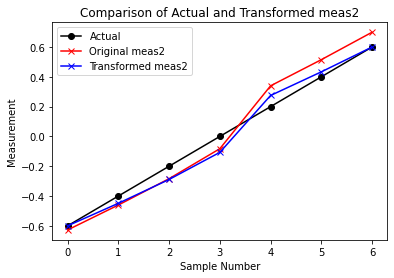

In [14]:
# Convert to numpy arrays for easier calculations
yaw = np.array(yaw)
actual_measurements = np.array(actual_measurements)

# Step 1: Calculate the scale factor
range_yaw = yaw.max() - yaw.min()
range_actual = actual_measurements.max() - actual_measurements.min()
scale_factor = range_actual / range_yaw

# Step 2: Calculate the shift offset
midpoint_yaw = (yaw.max() + yaw.min()) / 2
midpoint_actual = (actual_measurements.max() + actual_measurements.min()) / 2
shift_offset = midpoint_actual - (scale_factor * midpoint_yaw)

# Step 3: Apply the transformation
new_yaw = scale_factor * yaw + shift_offset

# Print results
print("Original yaw:", yaw)
print("Transformed yaw (aligned to actual):", new_yaw)
print("Actual measurements:", actual_measurements)

# Optionally, compare visually
import matplotlib.pyplot as plt

plt.plot(actual_measurements, label="Actual", marker='o', color='black')
plt.plot(yaw, label="Original yaw", marker='x', color='red')
plt.plot(new_yaw, label="Transformed yaw", marker='x', color='blue')

plt.xlabel('Sample Number')
plt.ylabel('Measurement')
plt.title('Comparison of Actual and Transformed yaw')
plt.legend()
plt.show()

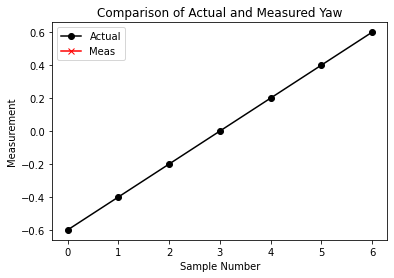

In [19]:
plt.plot(actual_measurements, label="Actual", marker='o', color='black')
plt.plot(yaw, label="Meas", marker='x', color='red')
#plt.plot(new_yaw, label="Transformed yaw", marker='x', color='blue')

plt.xlabel('Sample Number')
plt.ylabel('Measurement')
plt.title('Comparison of Actual and Measured Yaw')
plt.legend()
plt.show()

Polynomial coefficients: [-0.12632366  0.85001138  0.01605111]


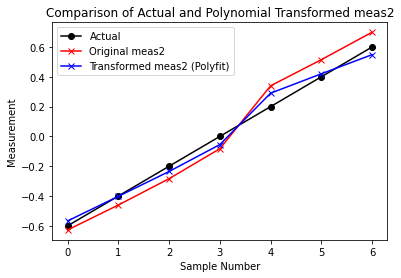

In [15]:
# Polynomial fitting (degree 2, 3, or higher)
coeffs = np.polyfit(yaw, actual_measurements, deg=2)  # Try degree 2 for a quadratic fit
new_yaw_poly = np.polyval(coeffs, yaw)

# Print the polynomial coefficients
print("Polynomial coefficients:", coeffs)

# Visualize the results
plt.plot(actual_measurements, label="Actual", marker='o', color='black')
plt.plot(yaw, label="Original yaw", marker='x', color='red')
plt.plot(new_yaw_poly, label="Transformed yaw (Polyfit)", marker='x', color='blue')

plt.xlabel('Sample Number')
plt.ylabel('Measurement')
plt.title('Comparison of Actual and Polynomial Transformed yaw')
plt.legend()
plt.show()

In [17]:

from sklearn.linear_model import Ridge

# Fit a Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(yaw.reshape(-1, 1), actual_measurements)
new_yaw_ridge = ridge.predict(yaw.reshape(-1, 1))

# Visualize the results
plt.plot(actual_measurements, label="Actual", marker='o', color='black')
plt.plot(yaw, label="Original yaw", marker='x', color='red')
plt.plot(new_yaw_ridge, label="Transformed yaw (Ridge)", marker='x', color='blue')

plt.xlabel('Sample Number')
plt.ylabel('Measurement')
plt.title('Comparison of Actual and Ridge Transformed yaw')
plt.legend()
plt.show()

ImportError: /usr/local/lib/python3.6/dist-packages/sklearn/__check_build/../../scikit_learn.libs/libgomp-d22c30c5.so.1.0.0: cannot allocate memory in static TLS block
___________________________________________________________________________
Contents of /usr/local/lib/python3.6/dist-packages/sklearn/__check_build:
setup.py                  __init__.py               _check_build.cpython-36m-aarch64-linux-gnu.so
__pycache__
___________________________________________________________________________
It seems that scikit-learn has not been built correctly.

If you have installed scikit-learn from source, please do not forget
to build the package before using it: run `python setup.py install` or
`make` in the source directory.

If you have used an installer, please check that it is suited for your
Python version, your operating system and your platform.